In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [12]:
housing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv", sep="\t")

housing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [ ]:
# Exercise 1

In [17]:
housing.info()
housing["SalePrice"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [20]:
house_num = housing.select_dtypes(include= ["float64", "int64"])
house_num_corr = house_num.corr()["SalePrice"][:-1] # -1 means that the latest row is SalePrice
top_features = house_num_corr[abs(house_num_corr) > .5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


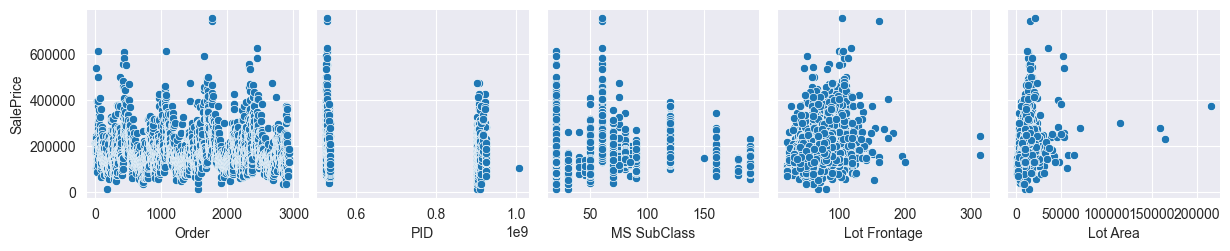

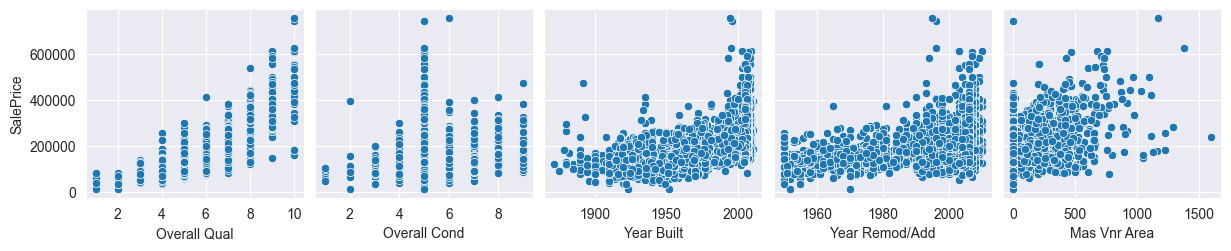

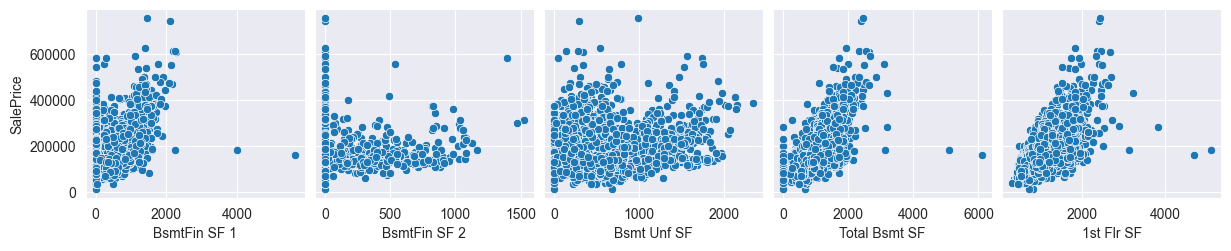

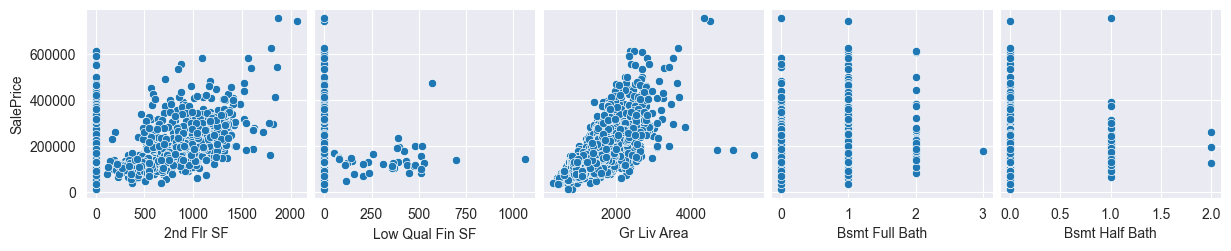

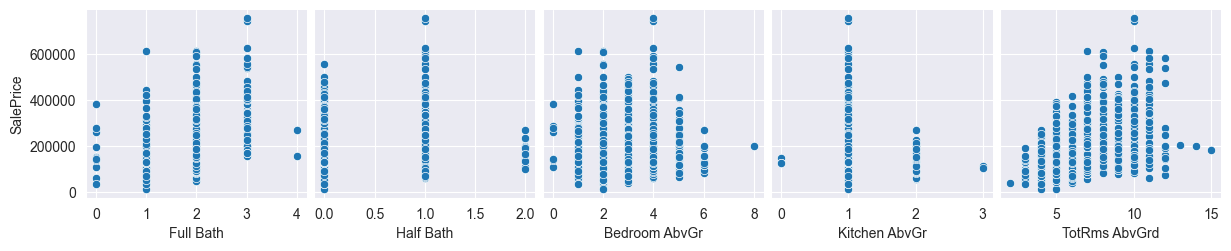

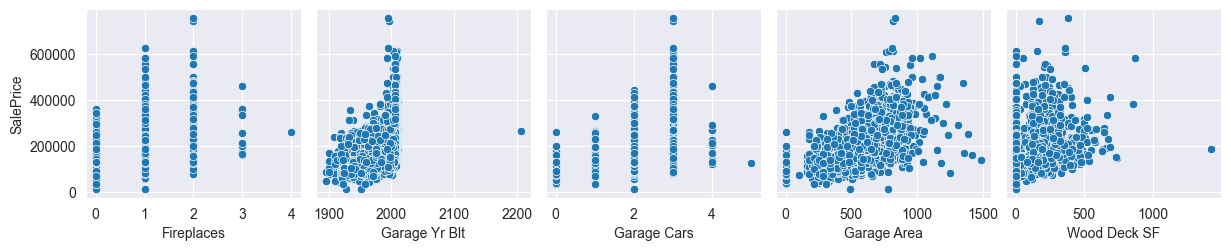

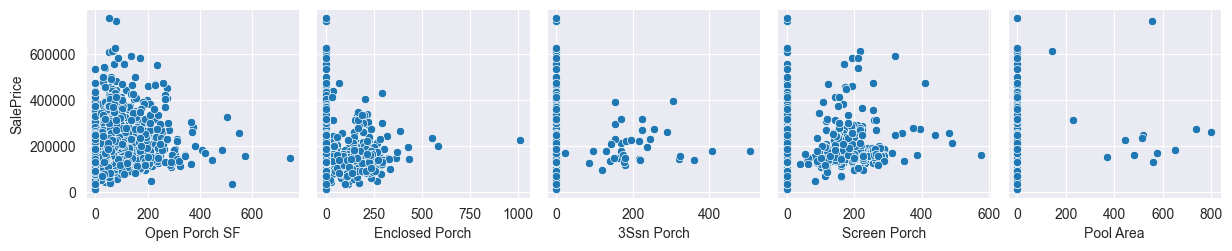

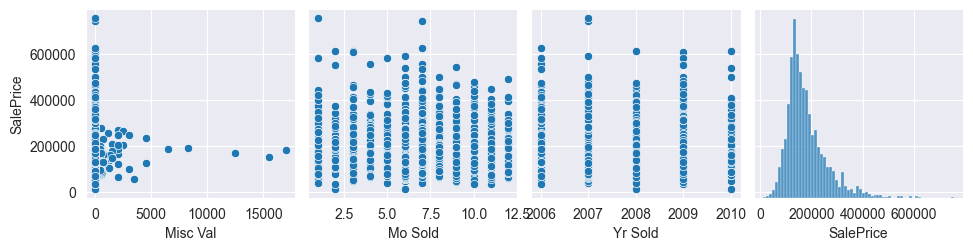

In [22]:
for i in range(0, len(house_num.columns), 5):
    sns.pairplot(data=house_num,
                 x_vars=house_num.columns[i:i+5],
                 y_vars=["SalePrice"])

In [30]:
log_transformed = np.log(housing["SalePrice"]) # transforms data, looks more normally distributed

Skewness: -0.015354


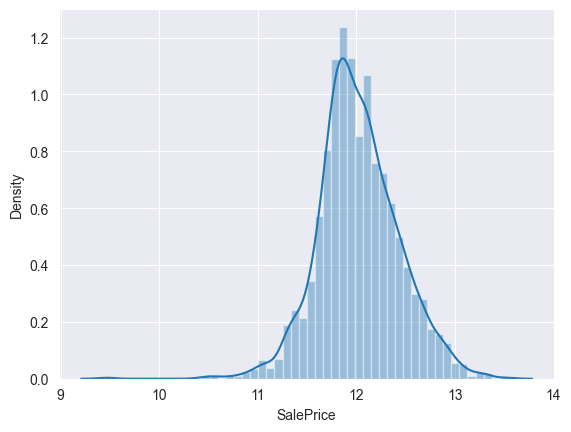

In [31]:
sp_untransformed = sns.distplot(log_transformed)
print("Skewness: %f" % log_transformed.skew()) #The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered highly skewed data.

In [ ]:
# Exercise 2

In [32]:
duplicate = housing[housing.duplicated(["PID"])]
# housing.index.is_unique
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [33]:
dup_removed = housing.drop_duplicates()
dup_removed

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
# Exercise 3

In [35]:
removed_sub = housing.drop_duplicates(subset=["Order"]) # if we want to remove duplicates from a specific subset


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Text(0.5, 1.0, 'Total Missing Values')

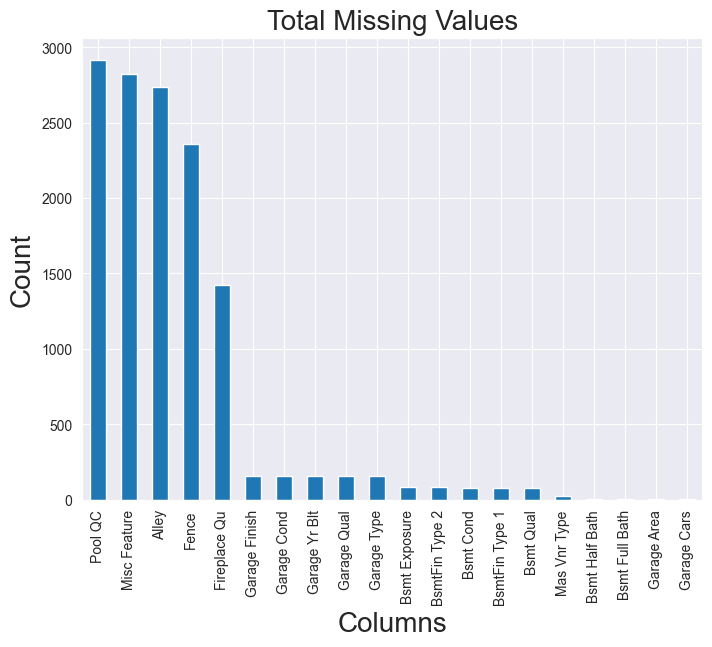

In [47]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8, 6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [42]:
housing.dropna(subset=["Lot Frontage"])
housing.drop("Lot Frontage", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [43]:
median = housing["Lot Frontage"].median()
median

68.0

In [44]:
housing["Lot Frontage"].fillna(median, inplace=True)
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [ ]:
# Exercise 4

In [46]:
mean = housing["Mas Vnr Area"].mean()
housing["Mas Vnr Area"].fillna(mean, inplace=True)

In [48]:
norm_data = MinMaxScaler().fit_transform(house_num)
norm_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

In [49]:
scaled_data = StandardScaler().fit_transform(house_num)
scaled_data

array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]])

In [ ]:
# Exercise 5

In [52]:
scaled_sub = StandardScaler().fit_transform(housing["SalePrice"][:, np.newaxis]) # need to be 2D array to work
scaled_sub

array([[ 0.4281423 ],
       [ 0.4281423 ],
       [-0.94923488],
       ...,
       [-0.61115139],
       [-0.13533019],
       [ 0.09005881]])

<AxesSubplot: xlabel='Lot Area'>

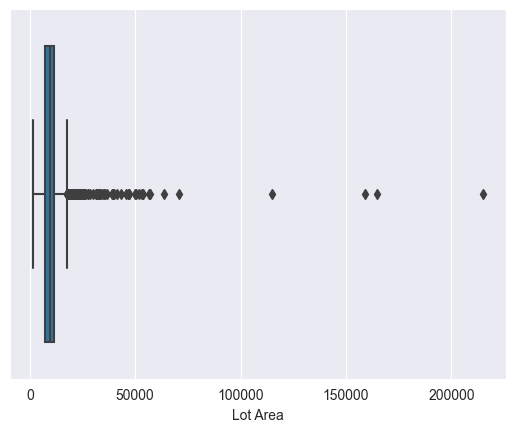

In [55]:
sns.boxplot(x=housing["Lot Area"])

<AxesSubplot: xlabel='SalePrice'>

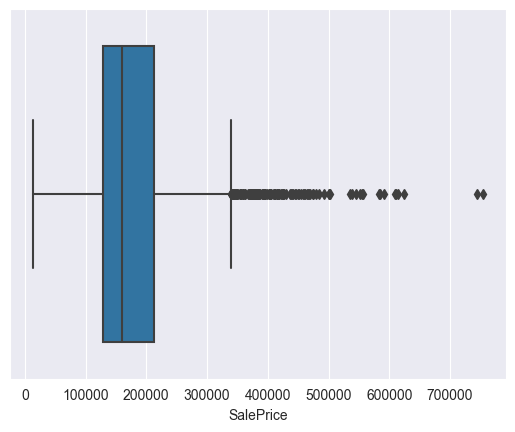

In [56]:
sns.boxplot(x=housing["SalePrice"])

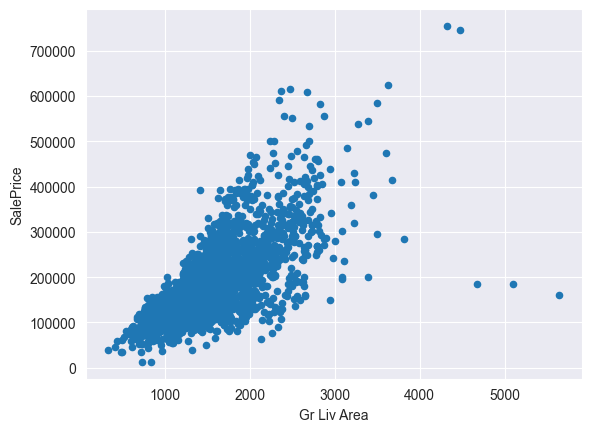

In [57]:
price_area = housing.plot.scatter(x="Gr Liv Area",
                                  y="SalePrice")

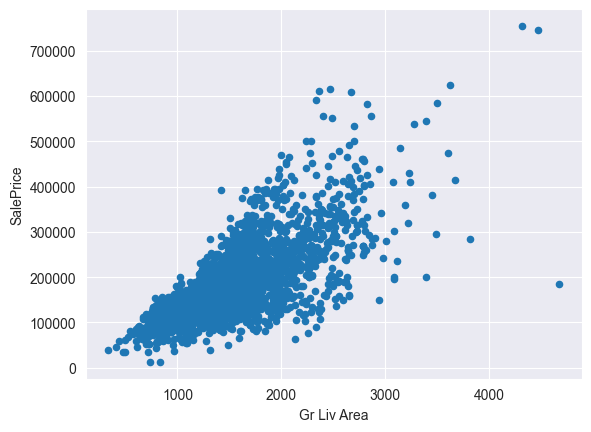

In [59]:
housing.sort_values(by="Gr Liv Area", ascending=False)[:2]
outliers_dropped = housing.drop(housing.index[[1499, 2181]])

new_plot = outliers_dropped.plot.scatter(x="Gr Liv Area",
                                         y="SalePrice")

In [ ]:
# Exercise 6

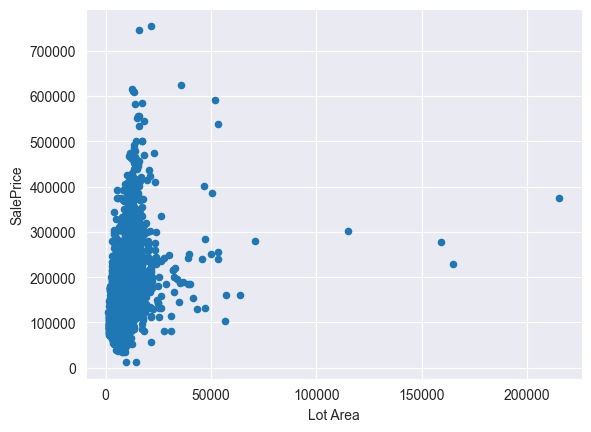

In [66]:
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])
housing[['Lot Area','Lot_Area_Stats']].describe().round(3)
housing.sort_values(by = 'Lot Area', ascending = False)[:1]
lot_area_rem = housing.drop(housing.index[[957]])

<AxesSubplot: xlabel='Lot Area'>

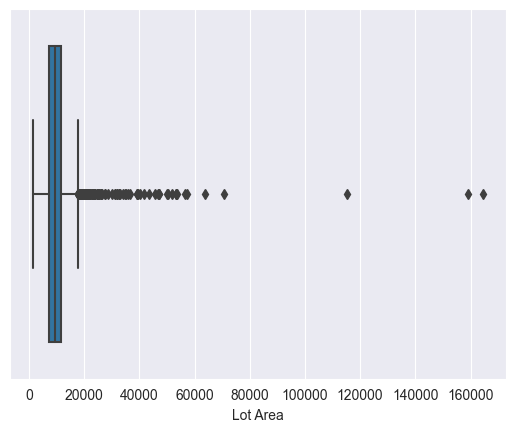

In [67]:
sns.boxplot(x=lot_area_rem['Lot Area'])

In [68]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2931.000,2931.000
mean,4.675,-0.000
std,46.303,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.882
